# Problem Set 4: Overlapping Generation Models
## Chapter 2: 3-period-lived agents with exogenous labor supply

### Exercise 2.1

In [1]:
import numpy as np
from scipy.optimize import root

# Initialize parameters
β = 0.442
δ = 0.6415
σ = 3
A = 1
α = 0.35
nvec = np.array([1., 1., 0.2])
L = np.sum(nvec)

# Define functions
r_f = lambda b2, b3 : (α * A * (np.sum(nvec) / (b2 + b3))**(1-α) - δ)
w_f = lambda b2, b3 : ((1-α) * A * ((b2 + b3)/np.sum(nvec))**(α))
up = lambda c : c**(-σ)

# Def system of equations to solve for the optimization pb
def system(bvec_guess): 
    '''
    This function defines the system of 2 FOC EE equations for the HH maximization problem
    '''
    b2 = bvec_guess[0]
    b3 = bvec_guess[1]
    r = r_f(b2,b3)
    w = w_f(b2, b3)
    
    vp1 = up(w*nvec[0] - b2) - β*(1+r)*up(w*nvec[1] + (1+ r)*b2-b3)
    vp2 = up(w*nvec[1] + (1 + r)*b2 - b3) - β*(1+ r)*up((1+r)*b3 + nvec[2]*w)
    
    return[vp1, vp2]

def solve(bvec_guess):
    '''
    This function solves the system of equations defined above for a given bvec guess.
    It then computes c1, c2, c3 and returns
    [b2, b3, c1, c2, c3]
    '''
    b2, b3 = root(system, bvec_guess).x
    
    c1 = w_f(b2, b3)*nvec[0] - b2
    c2 = w_f(b2, b3)*nvec[1] - b3 + b2*(1+r_f(b2, b3))
    c3 = w_f(b2, b3)*nvec[2] + b3*(1+r_f(b2, b3))

    return[b2, b3, c1, c2, c3]


def feasible(f_params, bvec_guess):
    '''
    This function checks whether the different constraints (on saving and consumption) are binding.
    '''
    nvec, A, α, δ, β = f_params
    
    # Set up pb
    b_cnstr = np.empty([2,], dtype='bool_')
    c_cnstr = np.empty([3,], dtype='bool_')
    K_cnstr = np.empty([1,], dtype='bool_')    
    
    # Compute Cs & bs (optimize)
    X = solve(bvec_guess)
    Bs = X[0:2]
    Cs = X[2:5]
    K = np.sum(Bs)
    
    # Print results
    print("Expected return is", r_f(Bs[0], Bs[1]))

    print("Savings in periods 1 and 2 are ", Bs)
    print("Consumption in periods 1, 2 and 3 are ", Cs)

    ### Check constrains       
    # K_cnstr
    if K <= 0:
        K_cnstr[0] = True 
    else:
        K_cnstr[0] = False
    
    # C_cnstr
    for i in range(3):
        if Cs[i] <= 0:
            c_cnstr[i] = True
        else:
            c_cnstr[i] = False
            
    # b_cnstr
    b_cnstr[:] = False
        
    if c_cnstr[0] == True:
        b_cnstr[0] = True
    if c_cnstr[1] == True:
        b_cnstr[0] = True
        b_cnstr[1] = True
    if c_cnstr[2] == True:
        b_cnstr[1] = True

    
    return print("\n Borrowing constraints in periods 1 and 2 are violated \t \t: ", b_cnstr, \
                 "\n Consumption constrains in periods 1, 2 and 3 are violated \t: ", c_cnstr, \
                 "\n The captial market clearing condition is violated \t \t: ", K_cnstr)

#### 2.2.A

In [2]:
f_params = (nvec, A, α, δ, β)
bvec_guess = np.array([1.0, 1.2])
feasible(f_params, bvec_guess)

Expected return is -0.6415
Savings in periods 1 and 2 are  [5.044998368424099e+45, 1.0865691165800383e+45]
Consumption in periods 1, 2 and 3 are  [-5.044998368424099e+45, 7.220627985000014e+44, 3.895350282939438e+44]

 Borrowing constraints in periods 1 and 2 are violated 	 	:  [ True False] 
 Consumption constrains in periods 1, 2 and 3 are violated 	:  [ True False False] 
 The captial market clearing condition is violated 	 	:  [False]


#### 2.2.B

In [3]:
f_params = (nvec, A, α, δ, β)
bvec_guess = np.array([0.06, -0.001])
feasible(f_params, bvec_guess)

Expected return is 3.036307374780331
Savings in periods 1 and 2 are  [0.06, -0.001]
Consumption in periods 1, 2 and 3 are  [0.12317391275691647, 0.4263523552437363, 0.03259847517660297]

 Borrowing constraints in periods 1 and 2 are violated 	 	:  [False False] 
 Consumption constrains in periods 1, 2 and 3 are violated 	:  [False False False] 
 The captial market clearing condition is violated 	 	:  [False]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


#### 2.2.C

In [4]:
f_params = (nvec, A, α, δ, β)
bvec_guess = np.array([0.1, 0.1])
feasible(f_params, bvec_guess)

Expected return is 2.433062339127069
Savings in periods 1 and 2 are  [0.019312529832027088, 0.05841109592113676]
Consumption in periods 1, 2 and 3 are  [0.18241212755849867, 0.20961468030898922, 0.24087386507209851]

 Borrowing constraints in periods 1 and 2 are violated 	 	:  [False False] 
 Consumption constrains in periods 1, 2 and 3 are violated 	:  [False False False] 
 The captial market clearing condition is violated 	 	:  [False]


## Exercise 2.2

In [5]:
import time
from matplotlib import pyplot as plt


def get_SS(params, bvec_guess, SS_graphs, exercise):
    
    
    start_time = time.clock()

    # Initialize parameters
    nvec, A, α, δ, β = params
    
    # Solve the optimal c and s
    X = solve(bvec_guess)
    b_ss = X[0:2]
    c_ss = X[2:6]
    K_ss = np.sum(b_ss)
    L_ss = np.sum(nvec)
    

    # Compute Euler error
    if (exercise==23):
        r_ss = r_f(b_ss)
        w_ss = w_f(b_ss)
        
    else:
        r_ss = r_f(b_ss[0], b_ss[1])
        w_ss = w_f(b_ss[0], b_ss[1])
        
    EulErr_ss = np.array([0., 0.])
    EulErr_ss[0] = up(w_ss*nvec[0] - b_ss[0]) - β*(1+r_ss)*up(w_ss*nvec[1] + (1+ r_ss)*b_ss[0]-b_ss[1])
    EulErr_ss[1] = up(w_ss*nvec[1] + (1 + r_ss)* b_ss[0] -  b_ss[1]) - β*(1+ r_ss)*up((1+r_ss)* b_ss[1] + nvec[2]*w_ss)
    
    # Compute resource constraint errors
    Y_ss = A*K_ss**α*L_ss**(1-α)
    RCerr_ss = 0
    RCerr_ss = Y_ss - np.sum(c_ss) - δ*K_ss
    
    ss_time = time.clock() - start_time
    ss_output = {
        "b_ss": b_ss,
        "c_ss": c_ss,
        "w_ss": w_ss,
        "r_ss": r_ss,
        "K_ss": K_ss,
        "Y_ss": Y_ss,
        "C_ss": c_ss,
        "EulErr_ss": EulErr_ss,
        "RCerr_ss": RCerr_ss,
        "ss_time": ss_time}
    
    if SS_graphs == True:
        plt.plot([20, 40, 60], c_ss, '-r')
        plt.title("Consumption Distribution over lifetime")
        plt.show()
        plt.plot([20, 40, 60], [b_ss[0], b_ss[1], 0], '-g')
        plt.title("Savings Distribution over lifetime")
        plt.show()
        
    return ss_output

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


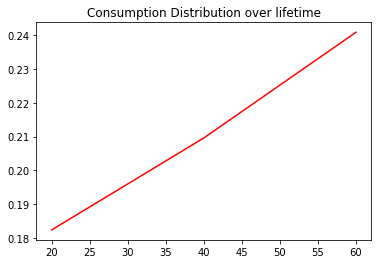

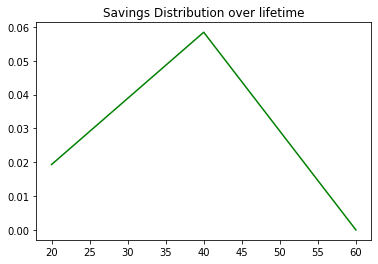

{'b_ss': [0.019312529832027088, 0.05841109592113676],
 'c_ss': [0.18241212755849867, 0.20961468030898922, 0.24087386507209851],
 'w_ss': 0.20172465739052575,
 'r_ss': 2.433062339127069,
 'K_ss': 0.07772362575316386,
 'Y_ss': 0.6827603788602411,
 'C_ss': [0.18241212755849867, 0.20961468030898922, 0.24087386507209851],
 'EulErr_ss': array([-1.39266376e-12,  2.62900812e-12]),
 'RCerr_ss': 8.326672684688674e-17,
 'ss_time': 0.0007310000000000372}

In [6]:
params = (nvec, A, α, δ, β)
bvec_guess = np.array([0.1, 0.1])
SS_graphs = True



get_SS(params, bvec_guess, True, 22)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


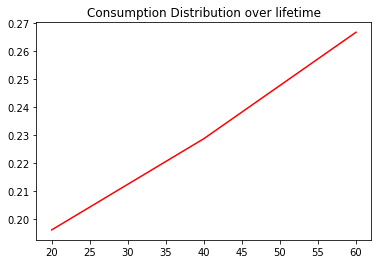

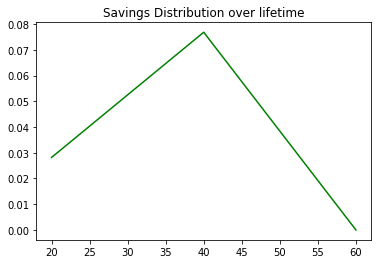

{'b_ss': [0.028176918915182085, 0.07686545131079861],
 'c_ss': [0.19597527701928497, 0.2286159413839988, 0.26669307195186887],
 'w_ss': 0.22415219593446706,
 'r_ss': 1.8863765057189819,
 'K_ss': 0.1050423702259807,
 'Y_ss': 0.7586689708551193,
 'C_ss': [0.19597527701928497, 0.2286159413839988, 0.26669307195186887],
 'EulErr_ss': array([6.87805368e-12, 2.52953214e-12]),
 'RCerr_ss': 9.71445146547012e-17,
 'ss_time': 0.0006119999999998349}

In [7]:
β = 0.55
params = (nvec, A, α, δ, β)
bvec_guess = np.array([0.1, 0.1])
SS_graphs = True

get_SS(params, bvec_guess, True, 22)


If $\beta$ increases, ie households become more patient: people save more in each period of their life ($b$ increases). This increases the capital in the production function and therefore the total production $Y$. 
This allows households to consume more in each period of their life.

## Exercise 2.3

In [8]:
import numpy as np
from scipy.optimize import root
import numpy as np
import time
import scipy.optimize as opt
import matplotlib.pyplot as plt
import scipy.linalg as la

def euleryoung(X, *params):
    '''
    Solves for the young guy's saving decision : b2 & b3
    Return 2 errors : error1 from EE in period 1 & error2 from EE in period 2
    '''
    
    w1,w2,w3, r2,r3 = params
    
    # Consumption in each period
    c1 = w1 - X[0]
    c2 = w2 + (1+r2)*X[0] - X[1]
    c3 = w3*0.2 + (1+r3)*X[1]
    
    # MU Consumption
    MU1 = uprime(c1)
    MU2 = uprime(c2)
    MU3 = uprime(c3)
    
    # Error
    error1 = MU1 - β*(1+r2)*MU2
    error2 = MU2 - β*(1+r3)*MU3
    error = [error1, error2]

    return error
    

def eulerma(X,*params):
    '''
    Solves for the medium age guy's saving decision : b3
    Returns the error for the guess X
    '''
    b3 = X
    w1,w2,r1,r2,b2 = params
    
    # Compute consumption from each period from BC
    c2 = w1 + (1+r1)*b2 - b3
    c3 = (1+r2)*b3 + 0.2*w2
    
    # Compute MU
    MU1 = uprime(c2)
    MU2 = uprime(c3)
    # Error
    error = MU1 - β*(1-r2)*MU2
    
    return error


r_f = lambda bvec : (α * A * (np.sum(nvec) / (np.sum(bvec)))**(1-α) - δ)
w_f = lambda bvec : ((1-α) * A * ((np.sum(bvec))/np.sum(nvec))**(α))
uprime = lambda c : c**(-σ)

def solve(bvec_guess):
    '''
    This function solves the system of equations defined above for a given bvec guess.
    It then computes c1, c2, c3 and returns
    [b2, b3, c1, c2, c3]
    '''
    b2, b3 = root(system, bvec_guess).x
    bvec = np.array([b2, b3])
    nvec = np.array([1.0, 1.0, 0.2])
    c1 = w_f(bvec)*nvec[0] - b2
    c2 = w_f(bvec)*nvec[1] - b3 + b2*(1+r_f(bvec))
    c3 = w_f(bvec)*nvec[2] + b3*(1+r_f(bvec))

    return[b2, b3, c1, c2, c3]

def system(bvec_guess): 
    '''
    This function defines the system of 2 FOC EE equations for the HH maximization problem
    '''

    r = r_f(bvec_guess)
    w = w_f(bvec_guess)
    nvec = np.array([1.0, 1.0, 0.2])

    vp1 = uprime(w*nvec[0] - bvec_guess[0]) - β*(1+r)*uprime(w*nvec[1] + (1+ r)*bvec_guess[0]-bvec_guess[1])
    vp2 = uprime(w*nvec[1] + (1 + r)*bvec_guess[0] - bvec_guess[1]) - β*(1+ r)*uprime((1+r)*bvec_guess[1] + nvec[2]*w)
    
    return[vp1, vp2]


In [9]:
### Time Path Iteration

def TPI(nvec, A, α, δ, β, maxIter, tol, T, bvec_guess):
    '''
    This function solves for the Time path equilibrium of savings & agg capital
    '''
    start_time = time.clock()

    # Set parameters
    params = nvec, A, α, δ, β 
    
    ### Get Steady State
    b_ss = get_SS(params, bvec_guess, False, 23)["b_ss"]
    r_ss = r_f(b_ss)
    w_ss = w_f(b_ss)
    
    
    ### Initial guess of aggregate capital
    bvec_init = np.array([0.8 * b_ss[0], 1.1 * b_ss[1]])
    K_init = np.sum(bvec_init)
    KSS = np.sum(b_ss)
    
    #print("KSS is ", KSS)
    #print("K_init is", K_init)

    ### Initial guess on transition = linear
    Kpath = np.linspace(K_init, KSS, T)
    # One more period in the SS to match indices
    Kpath = np.append(Kpath, KSS)

    ###Initial wage & interest rate paths
    r_path = np.zeros_like(Kpath)
    w_path = np.zeros_like(Kpath)
    for i in range(T+1):
        r_path[i] = r_f(Kpath[i])
        w_path[i] = w_f(Kpath[i])
        
    r_path = np.append(r_path, r_ss)
    w_path = np.append(w_path, w_ss)

    #print("Rpath is ", r_path)
    #print("Wpath is", w_path)
    ### Prepare iteration
    it = 1
    eps = 1
    
    
    
    while (it < maxIter and eps > tol):
        #print("Iteration ", it)

        #print("Kpath is ", Kpath)
        
        ## initialize matrices for the whole time period T
        # For each period: b2 & b3
        
        b_all = np.zeros((T+1, 2))
        EulErrs = np.zeros((T+1, 2))
        # Initial values = always trye
        b_all[0,0] = bvec_init[0]
        b_all[0,1] = bvec_init[1]
        
        
    
        
        # Solve for b32 (the middle age guy problem, only appears once at the beginning)
        params = w_path[0], w_path[1], r_path[0], r_path[1], bvec_init[0]
        middleagepb = root(eulerma, b_all[0,1], args =(params))
        b_all[1,1] = middleagepb.x
        EulErrs[1,1] = middleagepb.fun
        
        
        # Time Path Iteration
        # Solve for b_{2,t} and b_{3,t+1} using the twisted donut method
        for tt in range(1,T):
            # Solve the "young guy's problem"
            paramyoung = w_path[tt-1], w_path[tt], w_path[tt+1], r_path[tt], r_path[tt+1]
            # Guess = linear initial guess
            solve_young = root(euleryoung,np.array([0.1, 0.1]),args=(paramyoung))
            b_all[tt, 0] = solve_young.x[0]
            b_all[tt+1, 1] = solve_young.x[1]
            EulErrs[tt, 0] = solve_young.fun[0]
            EulErrs[tt+1, 1] = solve_young.fun[1]
            #print("Period ", tt, " Error1 is ", EulErrs[tt, 0], "and Eurror2 is ", EulErrs[tt+1, 1])
        
        
        # Maximum error on the euler
        max_Error = np.abs(EulErrs).max(axis = 0)
        #print("Max error is ", max_Error)
        # New capital path
        Kpath_new = b_all[:-1].sum(axis = 1)
        Kpath_new = np.append(Kpath_new, KSS)
        #print("New Kpath is", Kpath_new)
        #print("b_all is", b_all)
        
        # Error improvement (difference between the last guess)
        # Using L2 norm
        eps = la.norm(Kpath_new - Kpath, 2)
        #print("eps is ", eps)

        # Update Kpath, interest rate & wage
        Kpathcopy = ξ * Kpath_new + (1 - ξ)*Kpath
        Kpath = np.copy(Kpathcopy)
        
        
        for i in range(T+1):
            r_path[i] = r_f(Kpath[i])
            w_path[i] = w_f(Kpath[i])
        
        it = it+1
        
    
    # Output
    TPI_output = {
        'b_path': b_all, 
        'w_path': w_path, 
        'r_path': r_path,
        "Kpath": Kpath,
        "max_Error": max_Error,
    "Kss" : KSS,
    "r_ss": r_ss,
    "w_ss": w_ss}
        
    return TPI_output

In [10]:
tol = 1e-9
ξ = .8
T = 25
maxIter = 1000
β = 0.55
bvec_guess = np.array([0.1, 0.1])



result = TPI(nvec, A, α, δ, β, maxIter, tol, T, bvec_guess)
max_error = result["max_Error"]
b_path = result["b_path"]
w_path = result["w_path"]
r_path = result["r_path"]
Kpath = result["Kpath"]
KSS = result["Kss"]
wss = result["w_ss"]
rss = result["r_ss"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [11]:
tol = 1e-9
ξ = .8
T = 25
maxIter = 1000
β = 0.55
bvec_guess = np.array([0.1, 0.1])

params = nvec, A, α, δ, β 
    
### Get Steady State
#b_ss2 = get_SS(params, bvec_guess, False, 23)["b_ss"]

print("b_ss is ",b_path[T-1])
#print("b_ssout is", b_ss2)

b_ss is  [0.02817691 0.07686544]


In [12]:
#Maximum absolute error from the Euler errors
print(max_error)

[1.13520571e-08 1.27380951e+02]


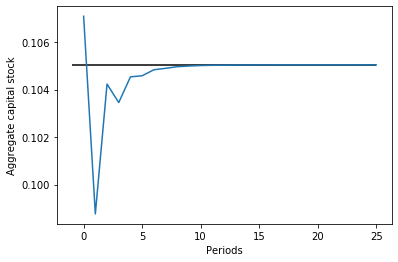

In [13]:
# Plot the equilibrium time paths of the aggregate capital stock
plt.plot(Kpath)
plt.hlines(KSS, -1, T)
plt.xlabel("Periods")
plt.ylabel("Aggregate capital stock")
plt.show()

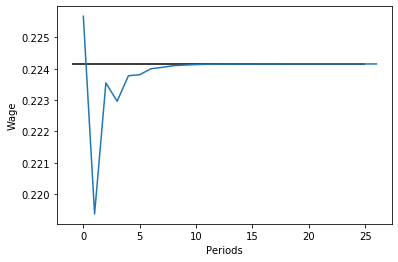

In [14]:
# Plot the equilibrium time paths of the wage 
plt.plot(w_path)
plt.hlines(wss, -1, T)
plt.xlabel("Periods")
plt.ylabel("Wage")
plt.show()

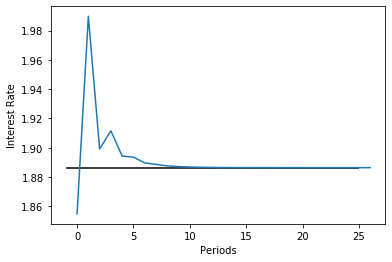

In [15]:
# Plot the equilibrium time paths of the Interest Rate 
plt.plot(r_path)
plt.hlines(rss, -1, T)
plt.xlabel("Periods")
plt.ylabel("Interest Rate")
plt.show()

In [22]:
To_ss = Kpath - KSS
print(To_ss)
To_ss_dummy = np.abs(To_ss) < 0.00001
np.where(To_ss_dummy)[0]

[ 2.05116135e-03 -6.28057061e-03 -8.08268600e-04 -1.58701224e-03
 -5.02911321e-04 -4.57293890e-04 -2.05712071e-04 -1.43924770e-04
 -7.50467849e-05 -4.72891615e-05 -2.63232580e-05 -1.58845530e-05
 -9.09437491e-06 -5.38711394e-06 -3.12017516e-06 -1.83350312e-06
 -1.06737921e-06 -6.25274826e-07 -3.64820452e-07 -2.13407366e-07
 -1.24617687e-07 -7.28496228e-08 -4.25560388e-08 -2.48568326e-08
 -1.41648933e-08  0.00000000e+00]


array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

It takes 12 periods for the economy to get back to its steady state.